# Titanic Classification

In [2]:
import pandas as pd

In [3]:
df1=pd.read_csv("ttrain.csv")

In [4]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df1.shape

(891, 12)

In [6]:
df2=pd.read_csv("ttest.csv")

In [7]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df2.shape

(418, 11)

In [9]:
df=pd.concat([df1,df2]) #df1 ve df2 birleştirildi

In [10]:
df.shape

(1309, 12)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [12]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [14]:
df.Survived.value_counts()

Survived
0.0    549
1.0    342
Name: count, dtype: int64

In [15]:
df.corr(numeric_only=True)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [16]:
import matplotlib.pyplot as plt

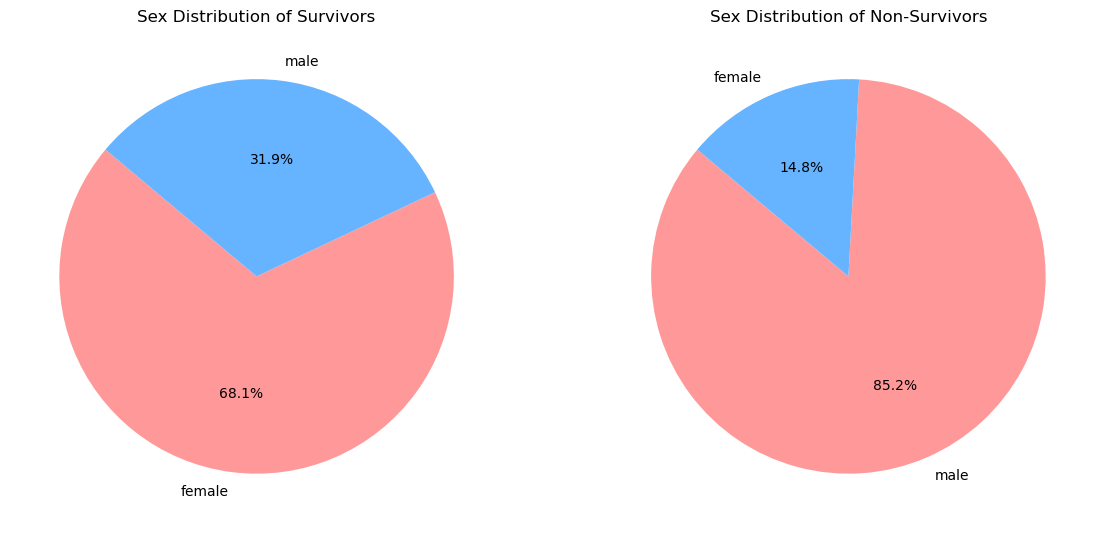

In [17]:
survived_sex_distribution = df[df['Survived'] == 1]['Sex'].value_counts()
not_survived_sex_distribution = df[df['Survived'] == 0]['Sex'].value_counts()

labels_survived = survived_sex_distribution.index
sizes_survived = survived_sex_distribution.values

labels_not_survived = not_survived_sex_distribution.index
sizes_not_survived = not_survived_sex_distribution.values

colors = ['#ff9999', '#66b3ff']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 7))

ax1.pie(sizes_survived, labels=labels_survived, autopct='%1.1f%%', colors=colors, startangle=140)
ax1.set_title('Sex Distribution of Survivors')

ax2.pie(sizes_not_survived, labels=labels_not_survived, autopct='%1.1f%%', colors=colors, startangle=140)
ax2.set_title('Sex Distribution of Non-Survivors')

plt.show()

In [18]:
del df['Cabin'] #cabin sütununda çok boş veri vardı doldurmak yerine silmeyi tercih ettik

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [20]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Embarked         2
dtype: int64

In [21]:
df['Fare'].value_counts()

Fare
8.0500     60
13.0000    59
7.7500     55
26.0000    50
7.8958     49
           ..
12.7375     1
45.5000     1
7.5750      1
7.5792      1
7.7208      1
Name: count, Length: 281, dtype: int64

In [22]:
df['Fare'] = df['Fare'].fillna(df['Fare'].mean()) #fare bir boş veri vardı doldurduk onu ortalamaya göre

In [23]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [24]:
df['Embarked'].value_counts() 

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [25]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0]) #ikisinin üç katı kadar S'den olmuş mod ile dolduruyoruz

In [26]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [27]:
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [28]:
df['Title'].value_counts() 

Title
Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Don           1
Sir           1
Lady          1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: count, dtype: int64

In [29]:
df['Title'] = df['Title'].replace(['Rev','Dr','Col','Major','Sir','Don','Capt','Jonkheer'], 'Mr') #outlinerları kaldırıyoruz

In [30]:
df['Title'].value_counts() 

Title
Mr          783
Miss        260
Mrs         197
Master       61
Ms            2
Mlle          2
Mme           1
Lady          1
Countess      1
Dona          1
Name: count, dtype: int64

In [31]:
df['Title'] = df['Title'].replace(['Lady','Countess','Dona','Mme'], 'Mrs')

In [32]:
df['Title'].value_counts() 

Title
Mr        783
Miss      260
Mrs       201
Master     61
Ms          2
Mlle        2
Name: count, dtype: int64

In [33]:
df['Title'] = df['Title'].replace(['Ms','Mlle'], 'Miss')

In [34]:
df['Title'].value_counts() 

Title
Mr        783
Miss      264
Mrs       201
Master     61
Name: count, dtype: int64

In [35]:
df['Age'] = df['Age'].fillna(df.groupby('Title')['Age'].transform('mean'))

In [36]:
df.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
Title            0
dtype: int64

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


In [38]:
del df['Name']

In [39]:
del df['Ticket']

In [40]:
del df['Embarked']

In [41]:
df = pd.get_dummies(df, drop_first=True)

In [42]:
df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,1,0.0,3,22.0,1,0,7.2500,True,False,True,False
1,2,1.0,1,38.0,1,0,71.2833,False,False,False,True
2,3,1.0,3,26.0,0,0,7.9250,False,True,False,False
3,4,1.0,1,35.0,1,0,53.1000,False,False,False,True
4,5,0.0,3,35.0,0,0,8.0500,True,False,True,False


In [43]:
train=df[:891]

In [44]:
test=df[891:]

In [45]:
train.tail()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
886,887,0.0,2,27.000000,0,0,13.00,True,False,True,False
887,888,1.0,1,19.000000,0,0,30.00,False,True,False,False
888,889,0.0,3,21.824366,1,2,23.45,False,True,False,False
889,890,1.0,1,26.000000,0,0,30.00,True,False,True,False
890,891,0.0,3,32.000000,0,0,7.75,True,False,True,False


In [46]:
test.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,892,NaN,3,34.5,0,0,7.8292,True,False,True,False
1,893,NaN,3,47.0,1,0,7.0000,False,False,False,True
2,894,NaN,2,62.0,0,0,9.6875,True,False,True,False
3,895,NaN,3,27.0,0,0,8.6625,True,False,True,False
4,896,NaN,3,22.0,1,1,12.2875,False,False,False,True


In [47]:
x = train.drop(columns=['Survived','PassengerId'])

In [48]:
y=train[['Survived']]

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
r=RandomForestClassifier()
g=GradientBoostingClassifier()

In [51]:
r.fit(x,y)

C:\Users\leyuz\anaconda3\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [52]:
test = test.drop(['PassengerId','Survived'], axis=1)

In [53]:
test.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Miss,Title_Mr,Title_Mrs
0,3,34.5,0,0,7.8292,True,False,True,False
1,3,47.0,1,0,7.0000,False,False,False,True
2,2,62.0,0,0,9.6875,True,False,True,False
3,3,27.0,0,0,8.6625,True,False,True,False
4,3,22.0,1,1,12.2875,False,False,False,True


In [54]:
r.predict(test)

array([0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 0., 1.,
       0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       0., 1., 1., 1., 0.

In [55]:
tahmin=r.predict(test)

In [56]:
sonuc=pd.DataFrame()

In [57]:
sonuc

""


In [58]:
sonuc['Survived']=tahmin

In [59]:
sonuc['PassengerId']=df2['PassengerId']

In [60]:
sonuc['Survived'] = sonuc['Survived'].astype('int32')

In [61]:
sonuc.head()

,Survived,PassengerId
0,0,892
1,0,893
2,1,894
3,1,895
4,0,896


In [62]:
sonuc.to_csv('sonuc1.csv', index=False)

In [64]:
sonuc.isnull().sum()

Survived       0
PassengerId    0
dtype: int64